# NSL-KDD

Le jeu de données NSL-KDD est une version modifiée du célèbre ensemble de données KDD Cup 1999, contient des informations sur les connexions réseau, avec des caractéristiques. Ces données sont utilisées pour évaluer la détection d'intrusion dans les réseaux, où l'objectif est de classifier les connexions normales ou Attaques. Les colonnes présentent une variété d'indicateurs qui peuvent être utilisés pour analyser et détecter des activités potentiellement malveillantes. 

### 1- Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import time

### 2- Chargement des données d'un fichier CSV avec Pandas:

In [2]:
train=pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\GENIE LOGICIEL S4\NSL_KDD_Train.csv')
test=pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\GENIE LOGICIEL S4\NSL_KDD_Test.csv')

### 3- Résumé sur l'ensemble de données

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


train = pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\GENIE LOGICIEL S4\NSL_KDD_Train.csv',header=None, names = col_names)
test = pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\GENIE LOGICIEL S4\NSL_KDD_Test.csv',header=None, names = col_names)

In [4]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,10.1,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.20,1.30,neptune
1,0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983.0,0.0,0.0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0.0,0.0,0.0,0.0,...,57.0,1.0,0.0,1.00,0.28,0.00,0.00,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0.0,15.0,0.0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan


In [6]:
print('Dimensions de l\'ensemble d\'entraînement:',train.shape)
print('Dimensions de l\'ensemble de test:',test.shape)

Dimensions de l'ensemble d'entraînement: (125973, 42)
Dimensions de l'ensemble de test: (22544, 42)


In [7]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
print('Distribution des étiquettes dans l\'ensemble d\'entraînement:')
print(train['label'].value_counts())
print()
print('Distribution des étiquettes dans l\'ensemble de test :')
print(test['label'].value_counts())

Distribution des étiquettes dans l'ensemble d'entraînement:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Distribution des étiquettes dans l'ensemble de test :
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint   

In [10]:
labeltrain=train['label']
# modifier la colonne des étiquettes
newlabel=labeltrain.replace({ 'normal' : 'normal', 'neptune' : 'DoS' ,'back': 'DoS', 'land': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
                           'ipsweep' : 'Probe','nmap' : 'Probe','portsweep' : 'Probe','satan' : 'Probe'
                           ,'ftp_write': 'R2L','guess_passwd': 'R2L','imap': 'R2L','multihop': 'R2L','phf': 'R2L','spy': 'R2L','warezclient': 'R2L','warezmaster':'R2L',
                           'buffer_overflow': 'U2R','loadmodule': 'U2R','perl': 'U2R','rootkit': 'U2R'})
# remettre la nouvelle colonne d'étiquettes
train['label'] = newlabel

labeltest=test['label']
# modifier la colonne des étiquettes
newlabel=labeltest.replace({ 'normal' : 'normal', 'neptune' : 'DoS' ,'back': 'DoS', 'land': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
                           'ipsweep' : 'Probe','nmap' : 'Probe','portsweep' : 'Probe','satan' : 'Probe'
                           ,'ftp_write': 'R2L','guess_passwd': 'R2L','imap': 'R2L','multihop': 'R2L','phf': 'R2L','spy': 'R2L','warezclient': 'R2L','warezmaster':'R2L',
                           'buffer_overflow': 'U2R','loadmodule': 'U2R','perl': 'U2R','rootkit': 'U2R', 'mscan': 'Probe', 'apache2': 'DoS', 'processtable': 'DoS', 'snmpguess': 'Probe',
                            'saint': 'Probe', 'mailbomb': 'DoS', 'snmpgetattack': 'Probe', 'httptunnel': 'DoS', 'named': 'Probe', 'ps': 'U2R', 'sendmail': 'R2L', 'xterm': 'U2R',
                            'xlock': 'U2R', 'xsnoop': 'U2R', 'worm': 'Probe', 'sqlattack': 'R2L', 'udpstorm': 'DoS'})
# remettre la nouvelle colonne d'étiquettes
test['label'] = newlabel

In [11]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DoS
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS


label
normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

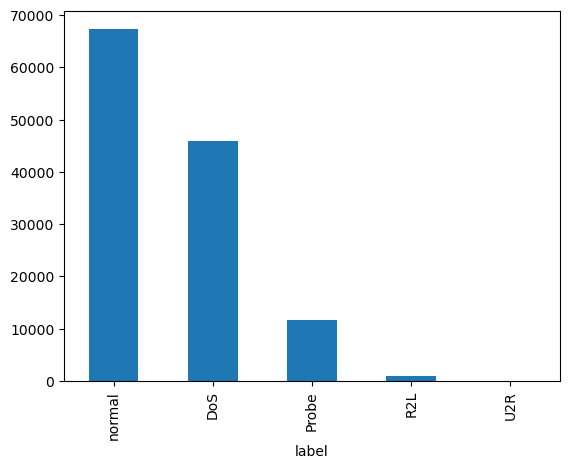

In [12]:
train["label"].value_counts().plot.bar()
train['label'].value_counts()

label
normal    9711
DoS       7591
Probe     2949
R2L       2215
U2R         78
Name: count, dtype: int64

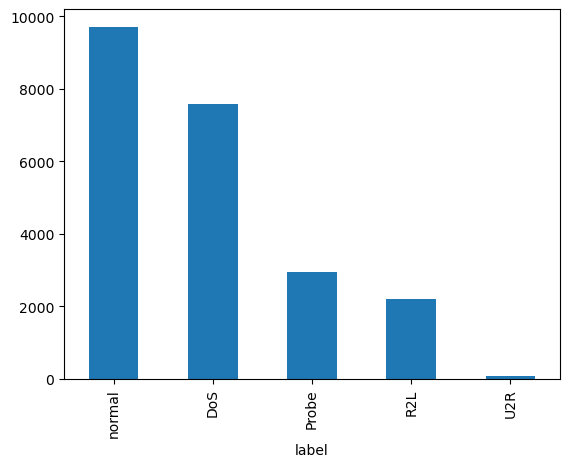

In [13]:
test["label"].value_counts().plot.bar()
test['label'].value_counts()

In [14]:
# Créez une nouvelle colonne 'labels' avec 0 pour 'normal' et 1 pour toutes les autres classes
train['labels'] = train['label'].apply(lambda x: 0 if x == 'normal' else 1)
test['labels'] = test['label'].apply(lambda x: 0 if x == 'normal' else 1)

([<matplotlib.patches.Wedge at 0x2758530e2d0>,
 [Text(-1.0935143225058905, -0.1192745843609747, 'Normal'),
  Text(1.0935143225058908, 0.11927458436097456, 'Attaque')],
 [Text(-0.5964623577304857, -0.06505886419689529, '53.5%'),
  Text(0.5964623577304857, 0.0650588641968952, '46.5%')])

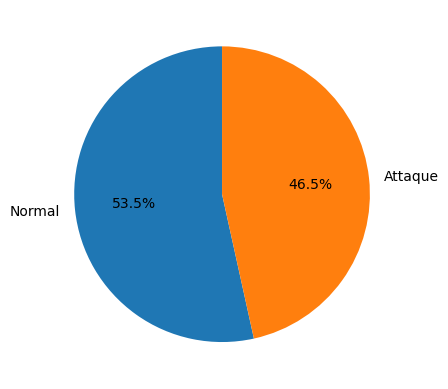

In [15]:
# Définissez les étiquettes pour les valeurs 0 et 1
labels = ['Normal', 'Attaque']
value_counts_train = train["labels"].value_counts(normalize=True)
# Créez le diagramme circulaire avec les étiquettes
plt.pie(value_counts_train, labels=labels, autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x275863f0710>,
 [Text(-1.0740765441390345, -0.23740172141403823, 'Normal'),
  Text(1.0740765441390345, 0.2374017214140381, 'Attaque')],
 [Text(-0.5858599331667461, -0.12949184804402084, '56.9%'),
  Text(0.5858599331667461, 0.12949184804402078, '43.1%')])

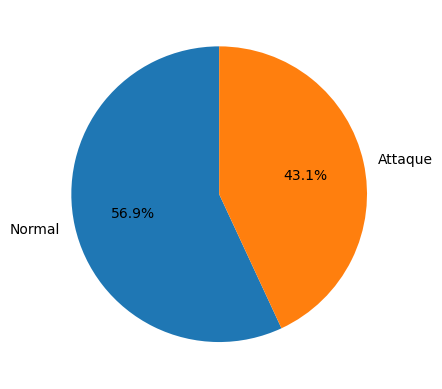

In [16]:
# Définissez les étiquettes pour les valeurs 0 et 1
labels = ['Normal', 'Attaque']
value_counts_test = test["labels"].value_counts(normalize=True)
# Créez le diagramme circulaire avec les étiquettes
plt.pie(value_counts_test, labels=labels, autopct='%1.1f%%', startangle=90)

In [17]:
# explorer les caractéristiques catégorielles
print('Ensemble d\'entraînement:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object' :
        unique_cat = len(train[col_name].unique())
        print("La caractéristique '{col_name}' a {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

# voir comment la fonctionnalité 'protocol_type' est distribuée
print()
print('Distribution des catégories dans Protocole :')
print(train['protocol_type'].value_counts())

# voir comment la fonctionnalité 'flag' est distribuée
print()
print('Distribution des catégories dans flag :')
print(train['flag'].value_counts())

Ensemble d'entraînement:
La caractéristique 'protocol_type' a 3 categories
La caractéristique 'service' a 70 categories
La caractéristique 'flag' a 11 categories
La caractéristique 'label' a 5 categories

Distribution des catégories dans Protocole :
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Distribution des catégories dans flag :
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64


In [18]:
# explorer les caractéristiques catégorielles
print('Ensemble de test :')
for col_name in test.columns:
    if test[col_name].dtype == 'object':
        unique_cat = len(test[col_name].unique())
        print("La caractéristique '{col_name}' a {unique_cat} catégories".format(col_name=col_name, unique_cat=unique_cat))

# voir comment la fonctionnalité 'protocol_type' est distribuée
print()
print('Distribution des catégories dans Protocole :')
print(test['protocol_type'].value_counts())

# voir comment la fonctionnalité 'flag' est distribuée
print()
print('Distribution des catégories dans flag :')
print(test['flag'].value_counts())

Ensemble de test :
La caractéristique 'protocol_type' a 3 catégories
La caractéristique 'service' a 64 catégories
La caractéristique 'flag' a 11 catégories
La caractéristique 'dst_host_same_srv_rate' a 203 catégories
La caractéristique 'dst_host_diff_srv_rate' a 198 catégories
La caractéristique 'label' a 5 catégories

Distribution des catégories dans Protocole :
protocol_type
tcp     18880
udp      2621
icmp     1043
Name: count, dtype: int64

Distribution des catégories dans flag :
flag
SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: count, dtype: int64


In [19]:
test = test.drop(columns=['dst_host_same_srv_rate'])
test = test.drop(columns=['dst_host_diff_srv_rate'])

train = train.drop(columns=['dst_host_same_srv_rate'])
train = train.drop(columns=['dst_host_diff_srv_rate'])

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

train_categorical_values = train[categorical_columns]
test_categorical_values = test[categorical_columns]

print(train_categorical_values.head())
print()
print(test_categorical_values.head())

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF

  protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO


In [21]:
train_enc=train_categorical_values.apply(LabelEncoder().fit_transform)
test_enc=test_categorical_values.apply(LabelEncoder().fit_transform)

print(train_categorical_values.head())
print('--------------------')
print(train_enc.head())
print()
print(test_categorical_values.head())
print('--------------------')
print(test_enc.head())

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9

  protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO
--------------------
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


In [22]:
# Colonnes à remplacer
colonnes_a_remplacer = ['protocol_type', 'service', 'flag']
# Remplacer les valeurs dans data1 par celles de data2
train[colonnes_a_remplacer] = train_enc[colonnes_a_remplacer]

train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,labels
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.00,0.00,1.00,1.00,0.00,0.00,DoS,1
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,1,24,9,199,420,0,0,0,0,...,255,255,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


In [23]:
# Colonnes à remplacer
colonnes_a_remplacer = ['protocol_type', 'service', 'flag']
# Remplacer les valeurs dans data1 par celles de data2
test[colonnes_a_remplacer] = test_enc[colonnes_a_remplacer]

test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,labels
0,0,1,45,1,0.1,0.2,0.3,0.4,0.5,0.6,...,255,10.1,0.22,0.23,0.24,0.25,1.20,1.30,DoS,1
1,0,1,45,1,0.0,0.0,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.00,0.00,0.00,1.00,1.00,DoS,1
2,2,1,19,9,12983.0,0.0,0.0,0.0,0.0,0.0,...,134,86.0,0.61,0.02,0.00,0.00,0.00,0.00,normal,0
3,0,0,13,9,20.0,0.0,0.0,0.0,0.0,0.0,...,3,57.0,1.00,0.28,0.00,0.00,0.00,0.00,Probe,1
4,1,1,55,2,0.0,15.0,0.0,0.0,0.0,0.0,...,29,86.0,0.03,0.02,0.00,0.00,0.83,0.71,Probe,1


In [24]:
train = train.drop(columns=['label'])
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,0.00,150,25,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,0.00,255,1,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,0.00,255,26,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,30,255,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,0.09,255,255,0.00,0.00,0.00,0.00,0.00,0.00,0


In [25]:
test = test.drop(columns=['label'])
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,45,1,0.1,0.2,0.3,0.4,0.5,0.6,...,0.21,255,10.1,0.22,0.23,0.24,0.25,1.20,1.30,1
1,0,1,45,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,255,1.0,0.00,0.00,0.00,0.00,1.00,1.00,1
2,2,1,19,9,12983.0,0.0,0.0,0.0,0.0,0.0,...,0.00,134,86.0,0.61,0.02,0.00,0.00,0.00,0.00,0
3,0,0,13,9,20.0,0.0,0.0,0.0,0.0,0.0,...,1.00,3,57.0,1.00,0.28,0.00,0.00,0.00,0.00,1
4,1,1,55,2,0.0,15.0,0.0,0.0,0.0,0.0,...,0.75,29,86.0,0.03,0.02,0.00,0.00,0.83,0.71,1


# Prétraitements convenables des données .

## 1.standarisation

In [26]:
#train
Scaler=StandardScaler().fit(train)
Scaler.transform(train)

array([[-0.11024922, -0.12470616, -0.68678521, ..., -0.22453241,
        -0.37638703, -0.93306891],
       [-0.11024922,  2.21931185,  0.78142753, ..., -0.38763462,
        -0.37638703, -0.93306891],
       [-0.11024922, -0.12470616,  1.08730518, ..., -0.38763462,
        -0.37638703,  1.07173221],
       ...,
       [-0.11024922, -0.12470616,  1.39318283, ..., -0.35501418,
        -0.37638703, -0.93306891],
       [-0.11024922, -0.12470616, -0.0750299 , ..., -0.38763462,
        -0.37638703,  1.07173221],
       [-0.11024922, -0.12470616, -0.68678521, ..., -0.38763462,
        -0.37638703, -0.93306891]])

In [27]:
#test
Scaler=StandardScaler().fit(test)
Scaler.transform(test)

array([[-0.15553409, -0.17630335,  0.93396356, ...,  2.49614197,
         2.67725809,  0.86989709],
       [-0.15553409, -0.17630335,  0.93396356, ...,  1.97966649,
         1.92893552,  0.86989709],
       [-0.15411277, -0.17630335, -0.88225435, ..., -0.60271089,
        -0.56547304, -1.14956126],
       ...,
       [-0.15553409, -0.17630335, -0.67269075, ..., -0.42194447,
        -0.39086444,  0.86989709],
       [-0.15553409,  2.34244362, -1.44109063, ..., -0.60271089,
        -0.56547304, -1.14956126],
       [-0.15553409, -0.17630335,  1.42294531, ...,  0.53353516,
         1.92893552,  0.86989709]])

## 2.normalisation

In [28]:
#train
Scaler=Normalizer().fit(train)
Scaler.transform(train)

array([[0.00000000e+00, 1.94368313e-03, 3.88736625e-02, ...,
        9.71841564e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.72164288e-03, 1.47876143e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.46483608e-03, 1.69776968e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.46483608e-03],
       ...,
       [0.00000000e+00, 4.38793018e-04, 2.36948230e-02, ...,
        4.38793018e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.39383008e-03, 1.01814902e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.39383008e-03],
       [0.00000000e+00, 3.25746569e-03, 6.51493137e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
#test
Scaler=Normalizer().fit(test)
Scaler.transform(test)

array([[0.00000000e+00, 2.89030947e-03, 1.30063926e-01, ...,
        3.46837136e-03, 3.75740231e-03, 2.89030947e-03],
       [0.00000000e+00, 3.41882832e-03, 1.53847274e-01, ...,
        3.41882832e-03, 3.41882832e-03, 3.41882832e-03],
       [1.54035812e-04, 7.70179058e-05, 1.46334021e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.81253879e-05, 3.98758535e-04, ...,
        1.26877716e-06, 1.26877716e-06, 1.81253879e-05],
       [0.00000000e+00, 5.49823927e-03, 3.02403160e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.82655457e-03, 1.98980837e-01, ...,
        1.68368401e-03, 3.82655457e-03, 3.82655457e-03]])

## 3.mise a l'échelle

In [30]:
#train
Scaler=MinMaxScaler(feature_range=(0,1))
Scaler.fit_transform(train)

array([[0.        , 0.5       , 0.28985507, ..., 0.05      , 0.        ,
        0.        ],
       [0.        , 1.        , 0.63768116, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.71014493, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.5       , 0.7826087 , ..., 0.01      , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.43478261, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.5       , 0.28985507, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
#test
Scaler=MinMaxScaler(feature_range=(0,1))
Scaler.fit_transform(test)

array([[0.00000000e+00, 5.00000000e-01, 7.14285714e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 7.14285714e-01, ...,
        8.33333333e-01, 7.69230769e-01, 1.00000000e+00],
       [3.46530365e-05, 5.00000000e-01, 3.01587302e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 5.00000000e-01, 3.49206349e-01, ...,
        5.83333333e-02, 5.38461538e-02, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.74603175e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 8.25396825e-01, ...,
        3.66666667e-01, 7.69230769e-01, 1.00000000e+00]])

# separation jeu d'entrainement et de test

In [32]:
X_train = train.drop('labels', axis=1)
y_train = train['labels']

X_test = test.drop('labels', axis=1)
y_test = test['labels']

print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (125973, 39)
Forme de X_test : (22544, 39)
Forme de y_train : (125973,)
Forme de y_test : (22544,)


# MODELISATION

## 1. modèle Régression logistique

In [33]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, logistic_predictions)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Logistic Regression Accuracy: 0.70
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.90      0.72      9711
           1       0.88      0.56      0.68     12833

    accuracy                           0.70     22544
   macro avg       0.74      0.73      0.70     22544
weighted avg       0.76      0.70      0.70     22544


Recall  0.5559884672329152
F1- Score   0.681535963320279

Temps d'exécution Détection de primitives : 4.260076999664307 secondes


[[8741  970]
 [5698 7135]]


<function matplotlib.pyplot.show(close=None, block=None)>

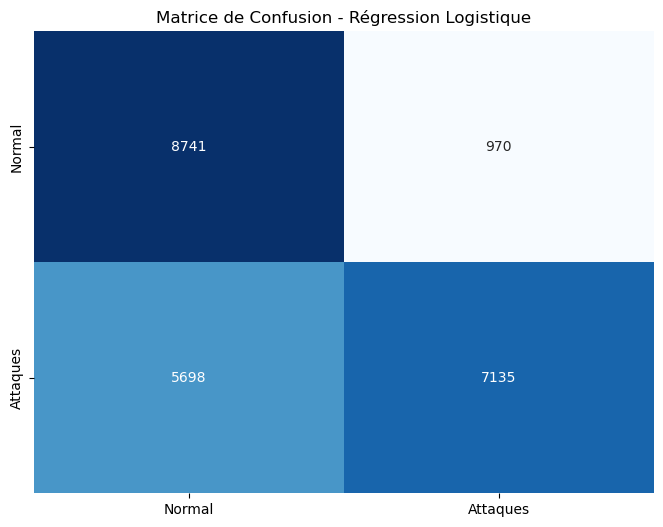

In [34]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Affichage de la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show

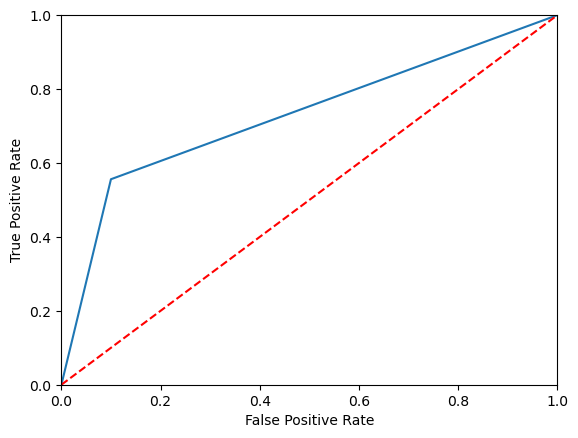

Area Under the Curve  0.7280508704200823


In [35]:
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % logistic_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', logistic_auc)

## 2. modele Random forest

In [36]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.7787881476224272
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.79      9711
           1       0.97      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.78     22544


Recall  0.6299384399594795
F1- Score   0.7642637674308674

Temps d'exécution Détection de primitives : 31.540401220321655 secondes


[[9473  238]
 [4749 8084]]


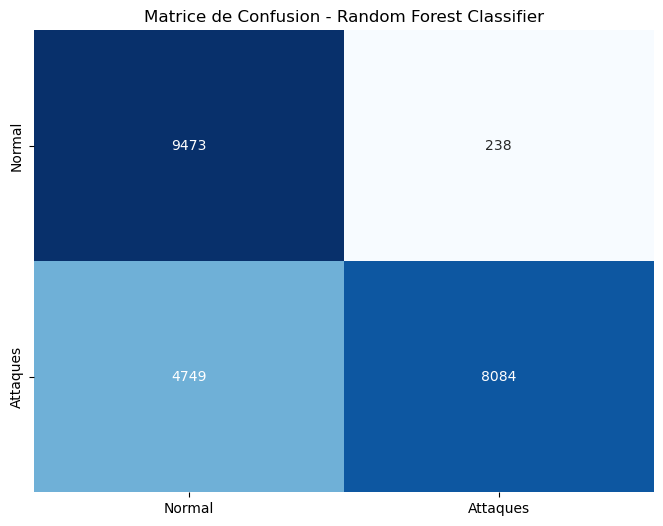

In [37]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Random Forest Classifier')
plt.show()

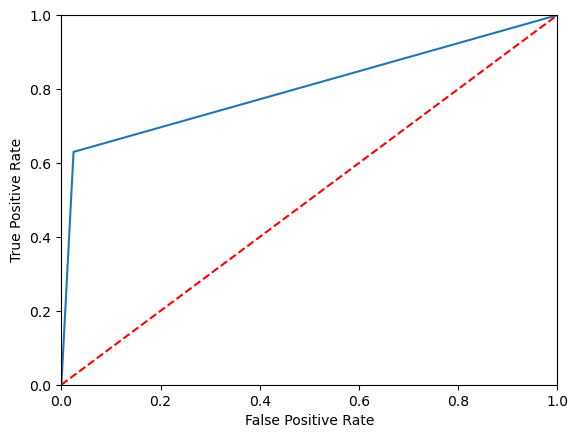

Area Under the Curve  0.8027150751954745


In [38]:
# Calculate AUC
RandomForest_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % RandomForest_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', RandomForest_auc)

## 3. modele Decision Tree

In [42]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the decision tree
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
# Predict on the test set
DecisionTree_pred = DecisionTree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
report = classification_report(y_test, DecisionTree_pred)
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.8134315117104329
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.96      0.82      9711
           1       0.96      0.70      0.81     12833

    accuracy                           0.81     22544
   macro avg       0.84      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544


Recall  0.6988233460609367
F1- Score   0.8100442597777978

Temps d'exécution Détection de primitives : 1.1179754734039307 secondes


[[9370  341]
 [3865 8968]]


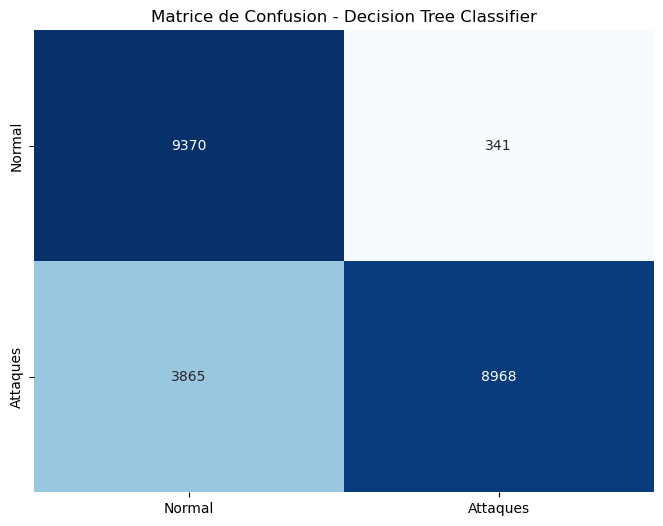

In [43]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Decision Tree Classifier')
plt.show()

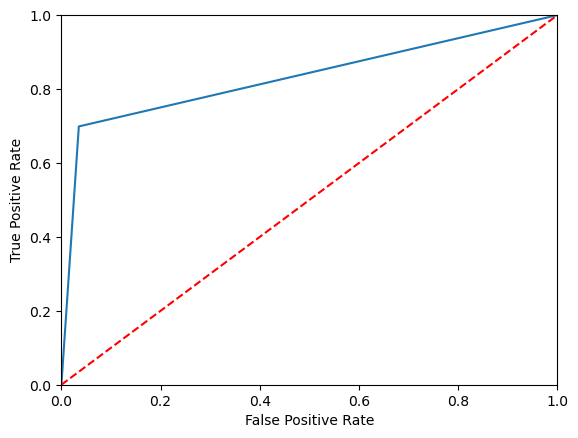

Area Under the Curve  0.8318542639067942


In [44]:
# Calculate AUC
DecisionTree_auc = roc_auc_score(y_test, DecisionTree_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, DecisionTree_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % DecisionTree_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', DecisionTree_auc)

## 4. Modele Support Vector Machines

In [36]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC
SVM = SVC(kernel = 'rbf',  C = 0.3, gamma = 0.02)
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.7010290986515259
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.98      0.74      9711
           1       0.97      0.49      0.65     12833

    accuracy                           0.70     22544
   macro avg       0.78      0.74      0.69     22544
weighted avg       0.81      0.70      0.69     22544


Recall  0.4896750564949739
F1- Score   0.6509218976590014

Temps d'exécution Détection de primitives : 10761.114181041718 secondes


[[9520  191]
 [6549 6284]]


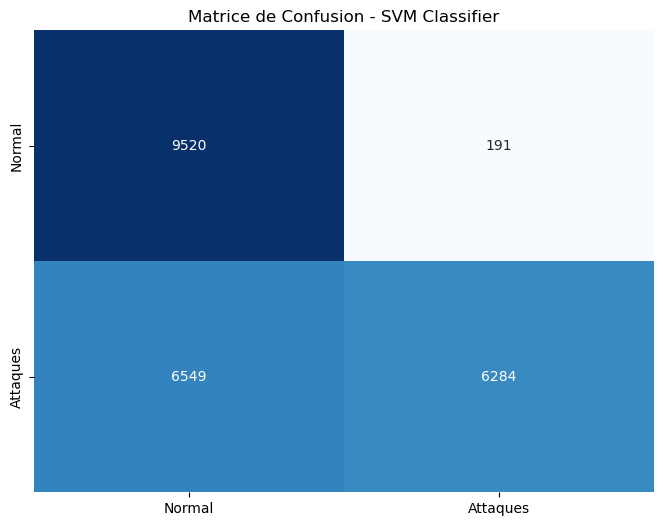

In [37]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']    

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

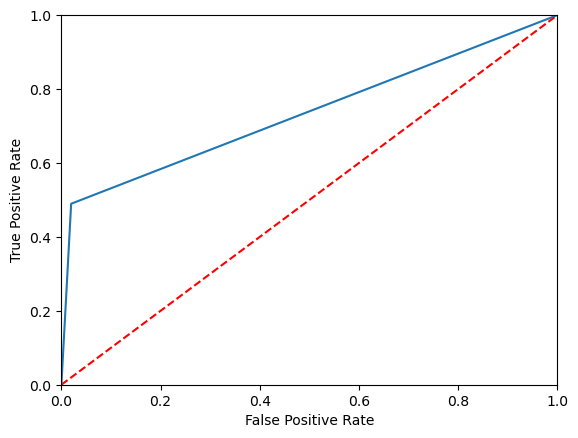

Area Under the Curve  0.7350033196180976


In [38]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC with linear kernel
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")


In [ ]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

In [ ]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

# 5. modele XGBCLASSIFIER

In [36]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.8236337828246983
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83      9711
           1       0.97      0.71      0.82     12833

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544


Recall  0.7121483674900647
F1- Score   0.8213354902489441

Temps d'exécution Détection de primitives : 2.4872920513153076 secondes


[[9429  282]
 [3694 9139]]


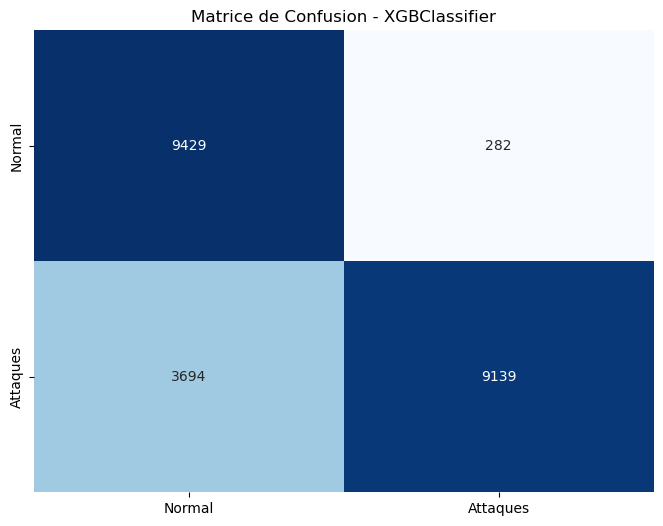

In [37]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - XGBClassifier')
plt.show()

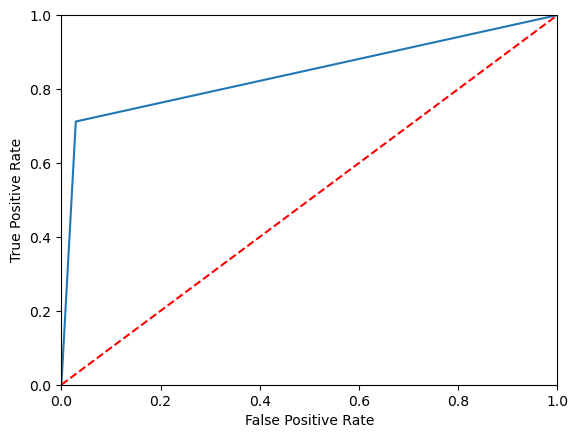

Area Under the Curve  0.8415545668157769


In [38]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, xgb_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

# Exemple

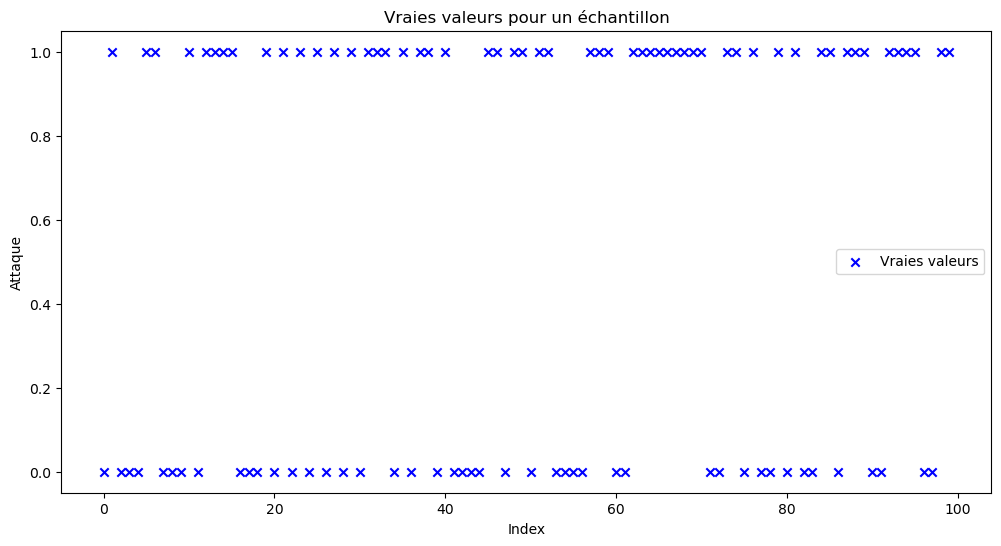

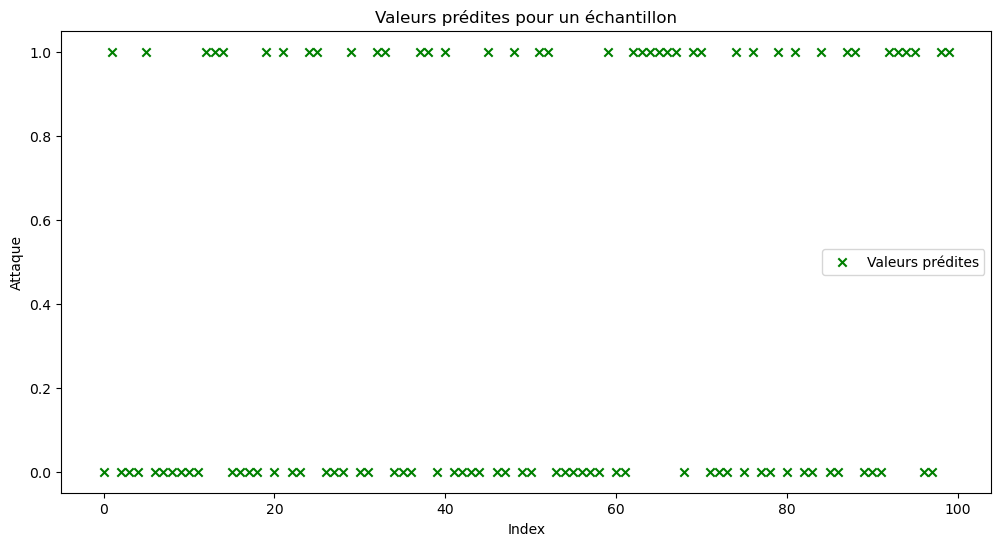

In [39]:
# Sélectionner un échantillon aléatoire de 1000 lignes
random_sample = train.sample(n=100, random_state=42)
# Séparer les caractéristiques (X) et la variable cible (y)
X_sample = random_sample.drop("labels", axis=1)
y_sample = random_sample["labels"]

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
y_pred_all = xgb_model.predict(X_test)

# Ajouter les colonnes des prédictions au DataFrame de l'ensemble de test
df_test_predictions = X_test.copy()
df_test_predictions['Real'] = y_test
df_test_predictions['Predictions_XGBClassifier'] = y_pred_all
# Sélectionner un échantillon aléatoire de 300 lignes dans l'ensemble de test
random_subset = df_test_predictions.sample(n=100, random_state=42)
# Plot pour les vraies valeurs
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Real'], label='Vraies valeurs', marker='x', color='blue')
plt.title('Vraies valeurs pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()
# Plot pour les valeurs prédites
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Predictions_XGBClassifier'], label='Valeurs prédites', marker='x', color='green')
plt.title('Valeurs prédites pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()

# Comparaison

comparaison valeur accuracy


<BarContainer object of 5 artists>

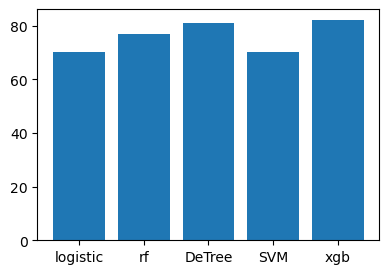

In [40]:
print ("comparaison valeur accuracy")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [70, 77, 81, 70, 82] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

comparaison temps d'execution


<BarContainer object of 5 artists>

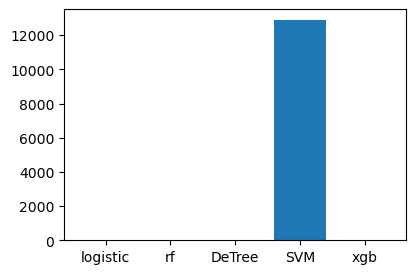

In [41]:
print ("comparaison temps d'execution")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [4.55, 31.38, 1.108, 12869.81, 2.585] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

comparaison valeur cur


<BarContainer object of 5 artists>

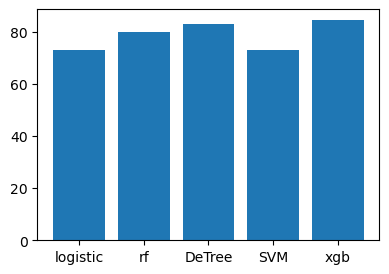

In [42]:
print ("comparaison valeur cur")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [73, 80.1, 83.3, 73, 84.6] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

# Reduction nombre colonnes

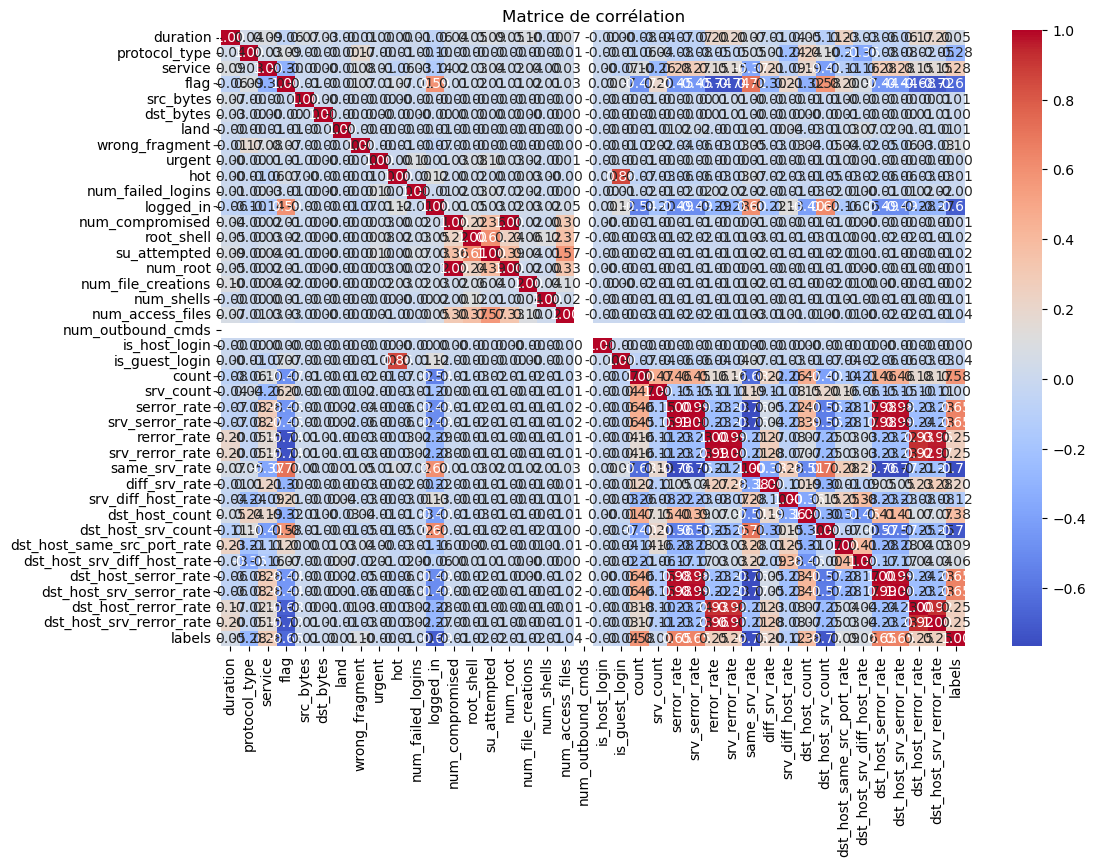

In [35]:
# Calculer la matrice de corrélation
correlation_matrix = train.corr()
# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [37]:
# Définir le seuil de corrélation
threshold = 0.2

# Extraire les colonnes ayant une corrélation absolue supérieure au seuil avec la variable cible
target_correlation = correlation_matrix['labels'].abs()
relevant_features = target_correlation[target_correlation > threshold]

# Sélectionner les colonnes pertinentes
relevant_columns = relevant_features.index.tolist()

# Calculer les colonnes à supprimer
columns_to_drop = [col for col in train.columns if col not in relevant_columns]

# Supprimer les colonnes non pertinentes
data_filtered = train.drop(columns=columns_to_drop)

# Afficher les colonnes sélectionnées
print("Colonnes sélectionnées :\n", relevant_columns)
print("\nColonnes supprimées :\n", columns_to_drop)

# Afficher les premières lignes du DataFrame filtré
print("\nDataFrame filtré :\n", data_filtered.head())

Colonnes sélectionnées :
 ['protocol_type', 'service', 'flag', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']

Colonnes supprimées :
 ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'srv_count', 'srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']

DataFrame filtré :
    protocol_type  service  flag  logged_in  count  serror_rate  \
0              1       20     9          0      2          0.0   
1              2       44     9          0     13          0.0   
2              1       49     5          0 

In [33]:
train.shape

(125973, 40)

In [39]:
data_filtered.shape

(125973, 18)

# XGBClassifier

In [42]:
#separation jeu d'entrainement et de test
X_train = train.drop('labels', axis=1)
y_train = train['labels']
X_test = test.drop('labels', axis=1)
y_test = test['labels']
#MODELISATION
start = time.time()
start_time = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.8236337828246983
[[9429  282]
 [3694 9139]]
Temps d'exécution Détection de primitives : 3.3319053649902344 secondes


# Logistic Regression

In [43]:
#MODELISATION
start = time.time()
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, logistic_predictions)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.7042228530872959
[[8741  970]
 [5698 7135]]
Temps d'exécution Détection de primitives : 4.322294473648071 secondes


# Random Forest

In [44]:
#MODELISATION
start = time.time()
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.7787881476224272
[[9473  238]
 [4749 8084]]
Temps d'exécution Détection de primitives : 18.09352397918701 secondes


# Decision Tree

In [45]:
#MODELISATION
start = time.time()
start_time = time.time()
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.8134315117104329
[[9370  341]
 [3865 8968]]
Temps d'exécution Détection de primitives : 1.3942558765411377 secondes


# SVM

In [47]:
#MODELISATION
start = time.time()
start_time = time.time()
SVM = SVC(kernel = 'rbf',  C = 0.3, gamma = 0.02)
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.7010290986515259
[[9520  191]
 [6549 6284]]
Temps d'exécution Détection de primitives : 9283.500880479813 secondes
